# Experiments - All tokens - Max tokens = 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2
from scipy.stats import ks_2samp

In [2]:
# 10k samples from PDFA obtained by Quantization Equivalence with kappa=100 and time bound of 300 seconds
PDFA = pd.read_csv('./results/pdfa_10k_all_tokens_length_n.csv')
# 10k samples from GPT2
LM = pd.read_csv('./results/llm_10k_all_tokens_length_n.csv')
# 10k samples from OUTLINES
OUTLINES = pd.read_csv('./results/outlines_10k_length_n.csv')

## Number distribution

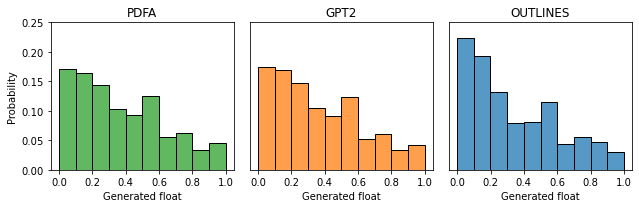

In [3]:
# Plot of histograms
B = 10
ymax = 0.25

fig, axes = plt.subplots(1, 3, figsize=(9,3))

sns.histplot(PDFA['floating-point'].values, bins=B, stat='probability', color='tab:green', legend=False, ax=axes[0])
axes[0].set_xlabel('Generated float')
axes[0].set_title(r'PDFA')
axes[0].set_ylim([0,ymax])

sns.histplot(LM['floating-point'].values, bins=B, stat='probability', color='tab:orange', legend=False, ax=axes[1])
axes[1].set_xlabel('Generated float')
axes[1].set_title('GPT2')
axes[1].set_ylim([0,ymax])
axes[1].set_yticks([])
axes[1].set_ylabel('')

sns.histplot(OUTLINES['floating-point'].values, bins=B, stat='probability', color='tab:blue', legend=False, ax=axes[2])
axes[2].set_xlabel('Generated float')
axes[2].set_title(r'OUTLINES')
axes[2].set_ylim([0,ymax])
axes[2].set_yticks([])
axes[2].set_ylabel('')

plt.tight_layout()
plt.savefig('Histogram_10k_all_tokens.png')

In [4]:
# Chi2 test with 10 bins
B = 10

# Grouping the data
pdfa = np.histogram(PDFA, bins=B)[0]
lm = np.histogram(LM, bins=B)[0]
outlines = np.histogram(OUTLINES, bins=B)[0]

# Chi2 statistics
chi2_PDFA_LM = np.sum((pdfa-lm)**2/(pdfa+lm))
print(f'Chi2 PDFA vs LM : {chi2_PDFA_LM}')

chi2_OUT_LM = np.sum((outlines-lm)**2/(outlines+lm))
print(f'Chi2 OUTLINES vs LM : {chi2_OUT_LM}')

# Degrees of freedom
df=B-1

# Chi2 pvalue
p_value_PDFA_LM = chi2.sf(chi2_PDFA_LM, df)
print(f'pvalue PDFA vs LM: {p_value_PDFA_LM}')

p_value_OUT_LM = chi2.sf(chi2_OUT_LM, df)
print(f'pvalue OUTLINES vs LM: {p_value_OUT_LM}')

Chi2 PDFA vs LM : 5.771999161255701
Chi2 OUTLINES vs LM : 176.29218980002892
pvalue PDFA vs LM: 0.7625029143624609
pvalue OUTLINES vs LM: 3.010183578482419e-33


In [5]:
# Chi2 test with 20 bins
B = 20

# Grouping the data
pdfa = np.histogram(PDFA, bins=B)[0]
lm = np.histogram(LM, bins=B)[0]
outlines = np.histogram(OUTLINES, bins=B)[0]

# Chi2 statistics
chi2_PDFA_LM = np.sum((pdfa-lm)**2/(pdfa+lm))
print(f'Chi2 PDFA vs LM : {chi2_PDFA_LM}')

chi2_OUT_LM = np.sum((outlines-lm)**2/(outlines+lm))
print(f'Chi2 OUTLINES vs LM : {chi2_OUT_LM}')

# Degrees of freedom
df=B-1

# Chi2 pvalue
p_value_PDFA_LM = chi2.sf(chi2_PDFA_LM, df)
print(f'pvalue PDFA vs LM: {p_value_PDFA_LM}')

p_value_OUT_LM = chi2.sf(chi2_OUT_LM, df)
print(f'pvalue OUTLINES vs LM: {p_value_OUT_LM}')

Chi2 PDFA vs LM : 118.96148557206732
Chi2 OUTLINES vs LM : 319.8876023339378
pvalue PDFA vs LM: 1.7339655867934922e-16
pvalue OUTLINES vs LM: 1.6517979876307252e-56


In [6]:
# KS test
ks_PDFA, p_value_PDFA = ks_2samp(PDFA['floating-point'].values, LM['floating-point'].values)
ks_OUT, p_value_OUT = ks_2samp(OUTLINES['floating-point'].values, LM['floating-point'].values)

print("KS PDFA vs LM:", ks_PDFA)
print("pvalue PDFA vs LM:", p_value_PDFA)

print("KS OUTLINES vs LM:", ks_OUT)
print("pvalue OUTLINES vs LM:", p_value_OUT)

KS PDFA vs LM: 0.0964
pvalue PDFA vs LM: 7.612065077083311e-41
KS OUTLINES vs LM: 0.0899
pvalue OUTLINES vs LM: 1.4309870391417165e-35


## Length distribution

In [7]:
pdfa_len = PDFA['floating-point'].apply(lambda x: len(str(x))-2)
lm_len = LM['floating-point'].apply(lambda x: len(str(x))-2)
out_len = OUTLINES['floating-point'].apply(lambda x: len(str(x))-2)

In [8]:
N = len(PDFA)

PDFA_LEN = pd.DataFrame(
    {
        'Model': ['PDFA']*N,
        'Length': pdfa_len.values
    }
)

LM_LEN = pd.DataFrame(
    {
        'Model': ['GPT2']*N,
        'Length': lm_len.values
    }
)

OUT_LEN = pd.DataFrame(
    {
        'Model': ['OUTLINES']*N,
        'Length': out_len.values
    }
)


LENGTH = pd.concat([PDFA_LEN,LM_LEN, OUT_LEN], ignore_index=True, axis=0)

In [9]:
m = len(LENGTH.value_counts())

Model = [LENGTH.value_counts().index[i][0] for i in range(m)]
Length = [LENGTH.value_counts().index[i][1] for i in range(m)]
Probability = [LENGTH.value_counts()[i]/N for i in range(m)]

LENGTH_PROBA = pd.DataFrame(
    {
        'Model' : Model,
        'Length' : Length,
        'Probability' : Probability
    }
)

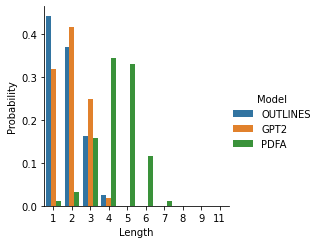

In [10]:
sns.catplot(x = 'Length',
            y='Probability',
            hue = 'Model',
            data=LENGTH_PROBA,
            kind='bar',
            height=3.5
            )

plt.savefig('Barplot_10k_all_tokens.png')

In [11]:
# KS test for Length
ks_length_PDFA_LM, p_value_length_PDFA_LM = ks_2samp(pdfa_len.values, lm_len.values)
ks_length_OUT_LM, p_value_length_OUT_LM = ks_2samp(out_len.values, lm_len.values)

print("KS LENGTH PDFA vs LM:", ks_length_PDFA_LM)
print("KS LENGTH OUTLINES vs LM:", ks_length_OUT_LM)
print("pvalue LENGTH PDFA vs LM:", p_value_length_PDFA_LM)
print("pvalue LENGTH OUTLINES vs LM:", p_value_length_OUT_LM)

KS LENGTH PDFA vs LM: 0.7826
KS LENGTH OUTLINES vs LM: 0.1245
pvalue LENGTH PDFA vs LM: 0.0
pvalue LENGTH OUTLINES vs LM: 6.496807846145073e-68
